# Problem set 3 (90 pts)

## Important note: the template for your solution filename is Name_Surname_PS3.ipynb

## Problem 1 (25 pts)

- (5 pts) Prove that $\mathrm{vec}(AXB) = (B^\top \otimes A)\, \mathrm{vec}(X)$ if $\mathrm{vec}(X)$ is a columnwise reshape of a matrix into a long vector. What does it change if the reshape is rowwise? 

**Note:** To make a columnwise reshape in Python one should use ```np.reshape(X, order='f')```, where the string ```'f'``` stands for the Fortran ordering. 

- (2 pts) What is the complexity of a naive computation of $(A \otimes B) x$? Show how it can be reduced.

- (3 pts) Let matrices $A$ and $B$ have eigendecompositions $A = S_A\Lambda_A S_A^{-1}$ and $B = S_B\Lambda_B S^{-1}_B$. Find eigenvectors and eigenvalues of the matrix $A\otimes I + I \otimes B$, where dimension of $I$ coincides with the dimension of $A$ and $B$.


- (10 pts) Let $A = \mathrm{diag}\left(\frac{1}{1000},\frac{2}{1000},\dots \frac{999}{1000}, 1, 1000 \right)$. Estimate analytically the number of iterations required  to solve linear system with $A$ with the relative accuracy $10^{-4}$ using
    - Richardson iteration with the optimal choice of parameter (use $2$-norm)
    - Chebyshev iteration (use $2$-norm)
    - Conjugate gradient method (use $A$-norm).
    
- (5 pts) Provide numerical confirmation of your estimate from theoretical point of view

**Task 1.1**
Let $U \in \mathbb{N}$. I will denote $[U] = \{0, 1, 2, \dots N-1\}$. Let $A$ be a matrix. As $A_{i, j}$ I will denote the matrix element corresponding to $i$-th row and $j$-th column.

Let $X \in \mathbb{R}^{N\times M}$, $A \in \mathbb{R}^{K \times N}$, $B \in \mathbb{R}^{M \times L}$. Then $B^T \otimes A \in \mathbb{R}^{KL \times NM}$, moreover, 
\begin{gather*}
    n \in [N], m \in [M], k \in [K], l \in [L] \Rightarrow \\
    \Rightarrow (B^T \otimes A)_{Kl + k, Nm + n} = B_{m, l} A_{k, n}
\end{gather*}

Concerning $\mathrm{vec}(X)$ we have the following:
\begin{gather*}
    n \in [N], m \in [M] \Rightarrow\\\Rightarrow
    \mathrm{vec}(X)_{Nm + n} = X_{n, m}
\end{gather*}

Analogously, 
\begin{gather*}
    k \in [K], l \in [L] \Rightarrow\\\Rightarrow
    \mathrm{vec}(AXB)_{Kl + k} = \left(AXB\right)_{k, l} = A_{k,\cdot} X B_{\cdot, l}
\end{gather*}
Here $A_{k, \cdot}$ is the $k$-th row of matrix $A$ an $B_{\cdot, l}$ is the $l$-th column of the matrix $B$.

Move on to our task:
\begin{gather*}
    \text{Let } k \in [K], l \in [L] \Rightarrow\\
    \Rightarrow \left((B^T \otimes A) \mathrm{vec}(X)\right)_{Kl + k} = \sum\limits_{n \in [N], m \in [M]} B_{m, l} A_{k, n} \mathrm{vec}(X)_{Nm + n} =\\=
    \sum\limits_{n \in [N], m \in [M]} B_{m, l} A_{k, n} X_{n, m} = \sum\limits_{n \in [N], m \in [M]} A_{k, n} X_{n, m} B_{m, l} = A_{k, \cdot} X B_{\cdot,l} = \mathrm{vec}(AXB)_{Kl + k}
\end{gather*}

So, we finally obtain, that $\mathrm{vec}(AXB) = (B^T \otimes A) \mathrm{vec}(X)$.

In case of using rowwise reshape the changes will be the following:
\begin{gather*}
    \begin{cases}
    (A\otimes B^T)_{Lk + l, Mn + m} = B_{m, l}A_{k, n}\\
    \mathrm{vec}_{rw}(X)_{Mn + m} = X_{n, m}\\
    \mathrm{vec}_{rw}(AXB)_{Lk + l} = A_{k,\cdot} X B_{\cdot, l}
    \end{cases} \Rightarrow \mathrm{vec}_{rw}(AXB) = (A\otimes B^T)\mathrm{vec}_{rw}(X)
\end{gather*}

**Task 1.2**

At first, we need the following statement:

**Statement** *(mixed product property)* Let $A, B, C, D$ be matrices (or vectors, which can be seen as special case of matrices) such, that $AB$ and $CD$ is well-defined (appropriate dimensions are coincide). Then:
\begin{gather*}
    (A\otimes B)(C \otimes D) = (AC) \otimes (BD)
\end{gather*}
Actually, it is well-known property, a proof can be found, for example, in the following paper [The Kronecker Product](https://digitalcommons.unf.edu/cgi/viewcontent.cgi?article=1025&context=etd), Theorem 7.

Move on to our task. Let $A \in \mathbb{R}^{k \times l}, B \in \mathbb{R}^{m\times n}$, $x \in \mathbb{R}^{ln}$. Then, in naive computation of $(A \otimes B) x$ we, at first, compute matrix $C = A \otimes B$ which requires $O(klmn)$ operations and $O(klmn)$ memory. Then we barely multiply $x$ by $C$ which (in simple assumption, that we don't use smart techniques like Strassen algorithm) also requires $O(klmn)$ operations. Therefore:
\begin{gather*}
    \textbf{Naive algorithm summary}\\
    \text{Computations: } O(klmn)\\
    \text{Memory: } O(klmn)
\end{gather*}

We come up with the following solution:
At first, from the *mixed product property* we have the following:
\begin{gather*}
    (A I_l) \otimes (I_m B) = (A \otimes I_m) (I_l \otimes B)\\
    I_l \otimes B = \mathrm{diag}(\underbrace{B, \dots, B}_{l \text{ times}}) = \begin{bmatrix} 
     B & 0 & \dots&  & 0\\
     0 & B & 0 & \dots & \\
     \vdots & \ddots & \ddots & \ddots & \vdots\\
      & \dots & 0 &  B& 0\\
     0 & \dots & & 0 & B
    \end{bmatrix} \in \mathbb{R}^{lm \times ln}\\
    A \otimes I_m = \begin{bmatrix}
    A_{1,1} I_m & \dots & A_{1,l} I_m\\
    \vdots & \ddots & \vdots\\
    A_{k, 1} I_m & \dots & A_{k, l} I_m
    \end{bmatrix} \in \mathbb{R}^{km \times ml}
\end{gather*}

To multiply $x$ by $I_l \otimes B$ we need $O(lmn)$ operations (we multply $x[ni:n(i + 1)]$ by $B$ for $i \in [l]$, for each multiplication we need $O(mn)$ operations). Let $ y = (I_l \otimes B) x$. Now we need to multiply $y$ by $A \otimes I_m$. Note, that each row of the matrix $A \otimes I_m$ includes only $l$ non-zero elements, corresponding to rows of matrix $A$. Also, the matrix $A \otimes I_m$ consists of $mk$ rows totally. Therefore, to multiply $y$ by $A \otimes i_m$ we need no more then $O(lmk)$ operations. Note, that each step we occupy no more then $O(ln + lm + km + kl + mn)$ of memory (I sum up storage of matrices $A$ and $B$, vector $x$, $y$ and result vector). Finally:
\begin{gather*}
    \textbf{More efficient implementation summary}\\
    \text{Computations: } O(lmk + lmn)\\
    \text{Memory: } O(ln + lm + km + kl + mn)
\end{gather*}

**Task 1.3**

Let $A \in \mathbb{C}^{n \times n}$ has eigenvectors $a_1, \dots a_n$ with eigenvalues $\lambda_1, \lambda_2 \dots, \lambda_n$ and let $B \in \mathbb{C}^{n \times n}$ has eigenvectors $b_1, \dots b_n$ with eigenvalues $\mu_1, \dots \mu_n$ (actually the eigenvectors are just columns of $S_A$ an $S_B$ respectively). Let's show, that $v_{ij} = a_i \otimes b_j$, $i, j \in \{1, \dots n\}$ are eigenvectors of $A \otimes I + I \otimes B$.

1. Let $(i_1, j_1) \neq (i_2, j_2)$. Then:
\begin{gather*}
    (a_{i_1} \otimes b_{j_1})^T (a_{i_2} \otimes b_{j_2}) = (a_{i_1}^T \otimes b_{j_1}^T) (a_{i_2} \otimes b_{j_2}) =\\=
    (a_{i_1}^T a_{i_2}) \otimes (b_{j_1}^T b_{j_2}) = 0 \quad (\text{ because }a_{i_1}^T a_{i_2} = 0 \text{ or } b_{j_1}^T b_{j_2} = 0 ) 
\end{gather*}

So, we obtain, that $v_{ij}$ are linearly independent and therefore form basis in $\mathbb{R}^{n^2}$

2. We have the following:
\begin{gather*}
    \left(A \otimes I + I \otimes B\right) v_{ij} = (A \otimes I) (a_i \otimes b_j) + (I \otimes B)(a_i \otimes b_j) = \\ 
    = (Aa_i) \otimes (Ib_j) + (Ia_i) \otimes (Bb_j) = (\lambda_i + \mu_j) a_i \otimes b_j
\end{gather*}

So, we obtain, that the matrix $A \otimes I + I \otimes B$ has eigenvectors $a_i \otimes b_j$, $i, j \in \{1, \dots n\}$ with corresponding eigenvalues $\lambda_i + \mu_j$.

**Task 1.4**

We have $A = \mathrm{diag}\left(\frac{1}{1000},\frac{2}{1000},\dots \frac{999}{1000}, 1, 1000 \right)$. Let's estimate number of iterations of different methods required to reach the relative accuracy $ \frac{\Vert x - x^*\Vert}{\Vert x^* \Vert} = 10^{-4}$

1. **Richardson iterations**

From the lecture, we know, that 
\begin{gather*}
    \Vert e_k\Vert_2 \leq q^{k} \Vert e_0\Vert_2, \,\, e_i = \Vert x_i - x^* \Vert_2, \,\, q = \frac{\mathrm{cond}(A) - 1}{\mathrm{cond}(A)+1} \Rightarrow\\
    \frac{\Vert x_n - x^*\Vert_2}{\Vert x^* \Vert_2} \leq q^{n} \frac{\Vert x_0 - x^* \Vert_2}{\Vert x^* \Vert_2}, \quad x_0 \text{ is initial approximation}
\end{gather*}
Given that for our matrix $q = \frac{10^6 - 1}{10^6 + 1}$ and supposing $\frac{\Vert x_0 - x^* \Vert_2}{\Vert x^* \Vert_2} \approx 1$ we obtain, that we need about $5 \cdot 10^6$ iterations to obtain the desired relative accuracy

2. **Chebyshev iterations**

As we know from the lecture, 
\begin{gather*}
    \Vert e_n \Vert_2 \leq \max\limits_{\xi \in [\lambda_{\min}, \lambda_{\max}]}\left|c T_{n}\left( \frac{2 \xi - (\lambda_{\max} + \lambda_{\min})}{\lambda_{\max} - \lambda_{\min}} \right)\right| \Vert e_0 \Vert_2
\end{gather*}

Here $T_n$ is the $n$-th Chebyshev polynomial and $\left|cT_n\left(\frac{-(\lambda_{\max} + \lambda_{\min})}{\lambda_{\max} - \lambda_{\min}}\right)\right| = 1 = \left|cT_n\left(\frac{\lambda_{\max} + \lambda_{\min}}{\lambda_{\max} - \lambda_{\min}}\right)\right|$ (the last equality follows from the properties of Chebyshev polynomial). 

We know, the following:
\begin{gather*}
    \begin{cases}
    \lambda_{\max} = 1000\\
    \lambda_{\min} = \frac{1}{1000}
    \end{cases} \Rightarrow |c| = \frac{1}{T_n\left(\frac{10^6 + 1}{10^6 - 1}\right)}
    \underbrace{\Rightarrow}_{\text{property of } T_n} |c| = \frac{1}{\mathrm{arccosh}(n \cosh(\frac{10^6 + 1}{10^6 - 1}))}
\end{gather*}

Since $\left|T_{n}\left( \frac{2 \xi - (\lambda_{\max} + \lambda_{\min})}{\lambda_{\max} - \lambda_{\min}} \right)\right| \leq 1$ on $\xi \in [\lambda_{\min}, \lambda_{\max}]$, then:
\begin{gather*}
    \Vert e_n \Vert_2 \leq \frac{\Vert e_0 \Vert_2}{\mathrm{arccosh}(n \cosh(\frac{10^6 + 1}{10^6 - 1}))} \Rightarrow\\
    \Rightarrow 
    \frac{\Vert x_n - x^*\Vert_2}{\Vert x^* \Vert_2} \leq \frac{1}{\mathrm{arccosh}(n \cosh(\frac{10^6 + 1}{10^6 - 1}))} \frac{\Vert x_0 - x^* \Vert_2}{\Vert x^* \Vert_2}
\end{gather*}

By estimating the expression $\mathrm{arccosh}(n \cosh(\frac{10^6 + 1}{10^6 - 1}))$ for different $n$ and supposing $\frac{\Vert x_0 - x^* \Vert_2}{\Vert x^* \Vert_2} \approx 1$ we obtain, that we need about $5 \cdot 10^3$ iterations to obtain the desired accuracy

3. **CG iterations**

From the lectures we know the following:

\begin{gather*}
    \frac{\Vert x_n - x^* \Vert_A }{\Vert x^* \Vert_A} \leq \inf_{q_n, q_n(0)=1} \max\limits_{\lambda\in[\lambda_{\min},\lambda_{\max}]} |q_n({\lambda})|, \quad q_n \in \mathrm{Poly}(n)
\end{gather*}

As we know, the $\inf$ in the equation above is obtained on $q_n(\lambda) = c T_{n}\left( \frac{2 \lambda - (\lambda_{\max} + \lambda_{\min})}{\lambda_{\max} - \lambda_{\min}} \right)$, $q_n(0) = 1$. Similarly to the previous subtask, we obtain:
\begin{gather*}
    \frac{\Vert x_n - x^* \Vert_A }{\Vert x^* \Vert_A} \leq \frac{1}{\mathrm{arccosh}(n \cosh(\frac{10^6 + 1}{10^6 - 1}))}
\end{gather*}
Therefore, we have the same estimation for the count of iteration needed.

**Task 1.4**

  0%|                                | 2916/4603154 [00:00<02:52, 26659.47it/s]

Richardson iterations will be repeated 4603154 times


100%|█████████████████████████████| 4603154/4603154 [04:01<00:00, 19051.94it/s]


Richardson iterations practice rel. error = 0.000053
Chebyshev iteratinos will be repeated 4950 times
Chebyshev iterations practice rel. error = 0.000083
CG iteratinos will be repeated 4952 times
CG iterations: Early stop at 138 iteration
CG iterations practice rel. error = 0.000091


D:\Anaconda3\envs\diplom_env\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


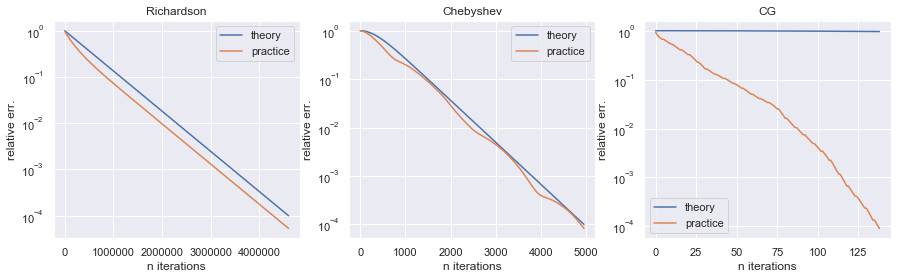

In [1]:
# Your solution is here
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
sns.set()

def get_cond_A(diag_A):
    '''
    Returns condition number of the matrix A in diagonal
    form with positive diagonal elements
    '''
    return np.max(diag_A)/np.min(diag_A)

def get_true_solution(diag_A, f):
    '''
    Returns true solution for the equation Ax = f
    A in diagonal form
    '''
    return f/diag_A

def get_relative_accuracy_factor(diag_A, f, x_0):
    x_true = get_true_solution(diag_A, f)
    return np.linalg.norm(x_0 - x_true, ord=2)/np.linalg.norm(x_true, ord=2)

def get_cheb_decay(n, _lambda_max):
    return 1./np.cosh(n * np.arccosh(
        (_lambda_max**2 + 1.)/(_lambda_max**2 - 1.)))

def create_A_norm(diag_A):
    def A_norm(x):
        return np.sqrt(np.sum(diag_A * x * x))
    return A_norm
    

def richardson_iterations(diag_A, f, x_0, rel_err=1e-4):
    rich_theory_est = []
    rich_prac_est = []
    cond_A = get_cond_A(diag_A)
    q = (cond_A - 1)/(cond_A + 1)
    relative_factor = get_relative_accuracy_factor(diag_A, f, x_0)
    n_iterations = np.int(
        np.ceil(np.log(rel_err/relative_factor)/np.log(q)))
    print("Richardson iterations will be repeated {} times".format(
        n_iterations))
    rich_theory_est.append(relative_factor)
    rich_prac_est.append(relative_factor)
    tau = 2/(np.max(diag_A) + np.min(diag_A))
    x_true = get_true_solution(diag_A, f)
    x_true_norm = np.linalg.norm(x_true, ord=2)
    e = x_0 - x_true
    for i_iter in tqdm(range(n_iterations)):
        e -= tau*diag_A*e
        rich_theory_est.append(rich_theory_est[-1]*q)
        rich_prac_est.append(np.linalg.norm(e, ord=2)/x_true_norm)
    print('Richardson iterations practice rel. error = {0:3f}'.format(
        float(rich_prac_est[-1])))
    return rich_theory_est, rich_prac_est

def launch_cheb_iters_once(niters, diag_A, e_0, _lambda_max):
    lm = _lambda_max
    roots = [np.cos((np.pi * (2 * i + 1)) / (2 * niters)) for i in range(niters)]
    taus = [2./(lm + 1./lm - (lm - 1./lm) * r) for r in roots]
    e = e_0.copy()
    good_perm = np.array([i for i in range(0, niters)])
    np.random.shuffle(good_perm)
    for i in range(niters):
        e -= taus[good_perm[i]] * (diag_A * e)
    return e

def chebyshev_iterations(diag_A, f, x_0, rel_err=1e-4, n_launches=100):
    cheb_theory_est = []
    cheb_prac_est = []
    _lambda_max=np.max(diag_A)
    relative_factor = get_relative_accuracy_factor(diag_A, f, x_0)
    n_iterations = 0
    x_true = get_true_solution(diag_A, f)
    x_true_norm = np.linalg.norm(x_true, ord=2)
    while True:
        n_iterations += 1
        if get_cheb_decay(
            n_iterations, _lambda_max) * relative_factor < rel_err:
            break
    print("Chebyshev iteratinos will be repeated {} times".format(
        n_iterations))
    n_diff = n_iterations//n_launches
    launches = list(range(1, n_iterations + 1, n_diff))
    if launches[-1] < n_iterations:
        launches.append(n_iterations)
    for niters in launches:
        cheb_theory_est.append(
            get_cheb_decay(niters, _lambda_max)*relative_factor)
        cheb_prac_est.append(np.linalg.norm(
            launch_cheb_iters_once(
                niters, diag_A, x_0 - x_true, _lambda_max), ord=2)/x_true_norm)
    print('Chebyshev iterations practice rel. error = {0:3f}'.format(
        float(cheb_prac_est[-1])))
    return cheb_theory_est, cheb_prac_est, launches

def cg_iteration_once(diag_A, f, r, p, x):
    r_sq = np.sum(r*r)
    alpha = r_sq/(np.sum(diag_A * p * p))
    x_new =  x + alpha * p
    r_new = r - alpha * diag_A * p
    beta = np.sum(r_new * r_new)/r_sq
    p_new = r_new + beta * p
    return r_new, p_new, x_new
    

def cg_iterations(diag_A, f, x_0, rel_err=1e-4):
    cg_theory_est = []
    cg_prac_est = []
    _lambda_max = np.max(diag_A)
    A_norm = create_A_norm(diag_A)
    x_true = get_true_solution(diag_A, f)
    x_true_norm = A_norm(x_true)
    n_iterations = 0
    while True:
        n_iterations += 1
        if get_cheb_decay(
            n_iterations, _lambda_max) < rel_err:
            break
    print("CG iteratinos will be repeated {} times".format(
        n_iterations))
    
    r = f - diag_A * x_0
    p = r.copy()
    x = x_0.copy()
    for i_iter in range(n_iterations):
        r, p, x = cg_iteration_once(diag_A, f, r, p, x)
        cg_theory_est.append(
            get_cheb_decay(i_iter, _lambda_max))
        cg_prac_est.append(A_norm(x - x_true)/x_true_norm)
        if cg_prac_est[-1] < rel_err:
            print('CG iterations: Early stop at {} iteration'.format(i_iter))
            break
    print('CG iterations practice rel. error = {0:3f}'.format(
        float(cg_prac_est[-1])))
    return cg_theory_est, cg_prac_est
        
    
    
    

np.random.seed(42)
A = np.diag(np.concatenate([np.arange(1., 1000)/1000., np.array([1., 1000.])]))
f = np.random.rand(A.shape[0])
x_0 = np.random.rand(A.shape[0])
diag_A = np.diag(A)

rich_th, rich_prac = richardson_iterations(diag_A, f, x_0, rel_err=1e-4)
cheb_th, cheb_prac, launches = chebyshev_iterations(diag_A, f, x_0, rel_err=1e-4)
cg_th, cg_prac = cg_iterations(diag_A, f, x_0, rel_err=1e-4)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))
ax[0].semilogy(rich_th, label='theory')
ax[0].semilogy(rich_prac, label='practice')
ax[0].legend()
ax[0].set_title('Richardson')
ax[0].set_xlabel('n iterations')
ax[0].set_ylabel('relative err.')

ax[1].semilogy(launches, cheb_th, label='theory')
ax[1].semilogy(launches, cheb_prac, label='practice')
ax[1].legend()
ax[1].set_title('Chebyshev')
ax[1].set_xlabel('n iterations')
ax[1].set_ylabel('relative err.')

ax[2].semilogy(cg_th, label='theory')
ax[2].semilogy(cg_prac, label='practice')
ax[2].legend()
ax[2].set_title('CG')
ax[2].set_xlabel('n iterations')
ax[2].set_ylabel('relative err.')

plt.show()

**Conclusion**

As we can see, for *Richardson* and *Chebyshev* iteration techniques the theoretical estimation for the count of iterations coincide with practical result. However, the theory and the practice diverge dramatically for *CG*. Such divergence can follow from the fact following:

As we know, 
$$\frac{\Vert x_n - x^* \Vert_A }{\Vert x^* \Vert_A} \leq \inf_{q_n, q(0)=1} \max_{j} |q_n({\lambda_j})|, \quad q_n \in \mathrm{Poly}(n)$$

However, for theoretical estimations we have performed the relaxation:
$$
\frac{\Vert x_n - x^* \Vert_A }{\Vert x^* \Vert_A} \leq \inf_{q_n, q_n(0)=1} \max\limits_{\lambda\in[\lambda_{\min},\lambda_{\max}]} |q_n({\lambda})|, \quad q_n \in \mathrm{Poly}(n)
$$

Actually, it can be the reason, why in practice *CG* converges much better, especially taking int account, that most of the eigenvalues of $A$ are clastered on the segment $[0, 1]$

## Problem 2 (40 pts)

### Spectral graph partitioning and inverse iteration


Given connected graph $G$ and its corresponding graph Laplacian matrix $L = D - A$ with eigenvalues $0=\lambda_1, \lambda_2, ..., \lambda_n$, where $D$ is its degree matrix and $A$ is its adjacency matrix, *Fiedler vector* is an eignevector correspondng to the second smallest eigenvalue $\lambda_2$ of $L$. Fiedler vector can be used for graph partitioning: positive values correspond to the one part of a graph and negative values to another.

### Inverse power method (15 pts)

To find the Fiedler vector we will use the inverse iteration with adaptive shifts (Rayleigh quotient iteration). 

* (5 pts) Write down the orthoprojection matrix on the space orthogonal to the eigenvector of $L$, corresponding to the eigenvalue $0$ and prove (analytically) that it is indeed an orthoprojection.
 
* (5 pts) Implement the spectral partitioning as the function ```partition```:

**Task 2.1.1**

As we know, the eigenvector, which corresponds to the eigenvalue $0$, equals (up to non-zero scalar) $e = (1, 1, \dots, 1)^T$. Let's prove, that orthoprojection matrix is as follows:
\begin{gather*}
    P = \begin{bmatrix}
    \frac{n - 1}{n} & \frac{-1}{n} & \dots & \frac{-1}{n}\\
    \frac{-1}{n} & \frac{n - 1}{n} & \ddots & \vdots\\
    \vdots & \ddots & \ddots & \frac{-1}{n}\\
    \frac{-1}{n} & \dots & \frac{-1}{n} & \frac{n - 1}{n}
    \end{bmatrix}_{n\times n} = I_n - \frac{1}{n} \begin{bmatrix}
    1 & \dots & 1\\
    \vdots &\ddots & \vdots\\
    1 & \dots & 1
    \end{bmatrix}_{n\times n}
\end{gather*}

Let's prove, that $P$ is indeed an orthprojection. Consider two linear spaces: $E = \mathrm{span}(e)$ and $Q = E^{\perp}$. Actually, our orthprojection operator $L_{proj}$ projects any vector $v \in \mathbb{R}^{n}$ onto $Q$. 

We have the following: $v^E \in E \Leftrightarrow v^E = \alpha e$. Consider any $v \in \mathbb{R}^{n}$. Then there exist unique vectors $v^E \in E$ and $v^Q \in Q$, such, that $v = v^E + v^Q$. Then, $\sum_{i = 1}^{n} v_i = (v, e) = (v^E, e) \Rightarrow v^E = \left(\frac{\sum\limits_{i = 1}^{n} v_i}{n}\right) e$. Consequently, $v^{Q} = v - \left(\frac{\sum\limits_{i = 1}^{n} v_i}{n}\right) e \Rightarrow L_{proj}( v ) = v - \left(\frac{\sum\limits_{i = 1}^{n} v_i}{n}\right) e$. Obviously, the matrix $P$ defines such orthprojection operator.

**Task 2.1.2**

Let's implement the `partition` function

In [1]:
import numpy as np
import scipy.sparse as spsp
from scipy.sparse.linalg import spsolve

def early_stop_activator_factory(eps):
    def early_stop_activate(eigs, A, x):
        if len(eigs) < 1:
            return False, 0.0
        # check if we already acheve eigenpair
        l = eigs[-1]
        x_mul = A.dot(x)
#         print(np.linalg.norm(x_mul - l * x, ord=2))
        if np.linalg.norm(x_mul - l * x, ord=2) < eps:
            return True, eps
        if len(eigs) < 2:
            return False, 0.0
        l_prev = eigs[-2]
        l = eigs[-1]
        diff_norm = np.linalg.norm(l - l_prev)
        _norm = np.linalg.norm(l)
        rel_tol = diff_norm/_norm
        
        x_mul = A.dot(x)
        
        return rel_tol <= eps, rel_tol
    return early_stop_activate

def orthoproject(x):
    return x - np.mean(x)

def rayleigh_quotient(A, x):
    return np.sum(A.dot(x) * x)/np.sum(x * x)

def solve_A_shifted(A, sigma, x):
    A_shifted = A - spsp.diags(
        (sigma,), (0,), shape=A.shape, format=A.format)
    return spsp.linalg.spsolve(A_shifted, x)

def inverse_iteration(A, sigma, x):
    x = solve_A_shifted(A, sigma, x)
    x = orthoproject(x) # do I need set it here?
    x = x / np.linalg.norm(x, ord=2)
    return x

def create_graph_laplacian(A):
    L = -A.copy()
    L.setdiag(-np.asarray(L.sum(axis=-1)).reshape(-1))
    return L

# INPUT:
# A - adjacency matrix (scipy.sparse.csr_matrix)
# num_iter_fix - number of iterations with fixed shift (int)
# shift - (float number)
# num_iter_adapt - number of iterations with adaptive shift (int) -- Rayleigh quotient iteration steps
# x0 - initial guess (1D numpy.ndarray)
# OUTPUT:
# x - normalized Fiedler vector (1D numpy.ndarray)
# eigs - eigenvalue estimations at each step (1D numpy.ndarray)
# eps - relative tolerance (float)
def partition(A, shift, num_iter_fix, num_iter_adapt, x0, eps, verbose=True):
    L = create_graph_laplacian(A)
    x = orthoproject(x0)
    x = x/np.linalg.norm(x, ord=2)
    eigs = []
    early_stop_activate = early_stop_activator_factory(eps)
    for i_fix_iter in range(num_iter_fix):
        eigs.append(rayleigh_quotient(L, x))
        activate, tol = early_stop_activate(eigs, L, x)
        x_new = inverse_iteration(L, shift, x)
        if activate or np.any(np.isnan(x_new)): 
            if verbose:
                print(
                    'Early stop activated on fix stage,',
                    'step {}'.format(i_fix_iter))
            return x, np.asarray(eigs), tol
        x = x_new
    for i_adapt_iter in range(num_iter_adapt):
        r = rayleigh_quotient(L, x)
        eigs.append(r)
        activate, tol = early_stop_activate(eigs, L, x)
        x_new = inverse_iteration(L, r, x)
        if activate or np.any(np.isnan(x_new)):
            if verbose:
                print(
                    'Early stop activated on adapt stage,', 
                    'step {}'.format(i_adapt_iter))
            return x, np.asarray(eigs), tol
        x = x_new
    _, tol = early_stop_activate(eigs, L, x)
    return x, np.asarray(eigs), tol

Test of our function

In [3]:
# an adjacency matrix
A = np.array([[0, 1., 1., 0], [1., 0, 1., 0], [1., 1, 0, 1], [0, 0, 1, 0]])
sA = spsp.csr_matrix(A)

# graph laplacian matrix
L = np.diag(A.sum(axis=-1)) - A
w, v = np.linalg.eig(L)
f_w, f_v = w[-1], v[:,-1]
f_v = orthoproject(f_v)
f_v /= np.linalg.norm(f_v, ord=2)
print('True Fiedler value: ', f_w)
print('True Fiedler vector: ', f_v*np.sign(f_v[0]))

np.random.seed(42)
x_0 = np.random.rand(4)
f_v_i, f_ws_i, tol = partition(sA, 1e-1, 2, 4, x_0, 1e-10)
print('Got Fiedler value: ', f_ws_i[-1])
print('Got Fiedler vector: ', f_v_i*np.sign(f_v_i[0]))

True Fiedler value:  0.9999999999999999
True Fiedler vector:  [ 4.08248290e-01  4.08248290e-01 -4.63182642e-17 -8.16496581e-01]
Got Fiedler value:  1.000000587076576
Got Fiedler vector:  [ 4.08248290e-01  4.08248291e-01  2.28300038e-12 -8.16496581e-01]


Algorithm must halt before `num_iter_fix + num_iter_adapt` iterations if the following condition is satisfied $$ \boxed{\|\lambda_k - \lambda_{k-1}\|_2 / \|\lambda_k\|_2 \leq \varepsilon} \text{ at some step } k.$$

Do not forget to use the orthogonal projection from above in the iterative process to get the correct eigenvector.
It is also a good idea to use ```shift=0``` before the adaptive stragy is used. This, however, is not possible since the matrix $L$ is singular, and sparse decompositions in ```scipy``` does not work in this case. Therefore, we first use a very small shift instead.

* (3 pts) Generate a random `lollipop_graph` using `networkx` library and find its partition. [Draw](https://networkx.github.io/documentation/networkx-1.9/examples/drawing/labels_and_colors.html) this graph with vertices colored according to the partition.

* (2 pts) Start the method with a random initial guess ```x0```, set ```num_iter_fix=0``` and comment why the method can converge to a wrong eigenvalue.

**Task 2.1.3**

Let's create `lollipop_graph` and see the partitioning of the graph by implemented function

In [17]:
import matplotlib.pyplot as plt
import networkx as nx

def draw_partition(graph, f_vec, title='Partitioned lollipop graph'):
    n_pos = list(np.where(f_vec > 0)[0])
    n_neg = list(np.where(f_vec <= 0)[0])
    print('Num positive components: {}'.format(len(n_pos)))
    print('Num negative components: {}'.format(len(n_neg)))
    pos=nx.spring_layout(graph)
    plt.figure(figsize=(8, 6), dpi=100)
    
    nx.draw_networkx_nodes(graph,pos,
                           nodelist=n_pos,
                           node_color='r',
                           node_size=25,
                       alpha=0.8)
    nx.draw_networkx_nodes(graph,pos,
                           nodelist=n_neg,
                           node_color='b',
                           node_size=25,
                       alpha=0.8)
    nx.draw_networkx_edges(graph,pos,width=1.0,alpha=0.5)
    plt.axis('off')
    plt.title(title)
    plt.show()

Create lollipop graph with n=38 and m=28
Early stop activated on adapt stage, step 1
Num positive components: 43
Num negative components: 23


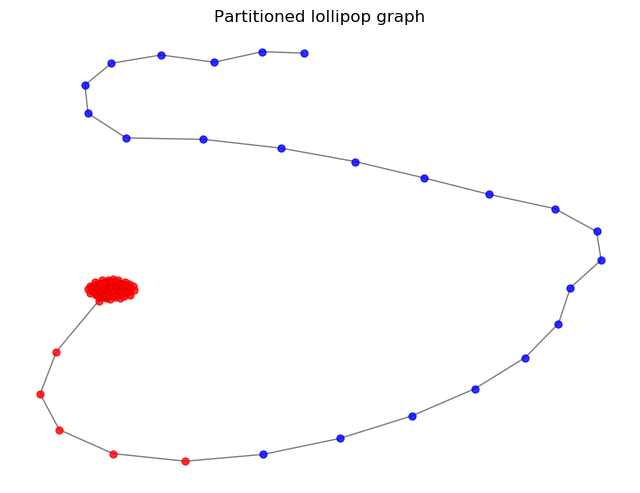

In [6]:
import networkx as nx
np.random.seed(42)
n_max = 40
m_max = 40
n = np.random.randint(0, n_max)
m = np.random.randint(0, m_max)
print('Create lollipop graph with n={} and m={}'.format(n, m))
llg = nx.generators.classic.lollipop_graph(n, m)
A = nx.linalg.graphmatrix.adjacency_matrix(llg)

shift=1e-2
num_iter_fix = 4
num_iter_adapt = 4
eps=1e-10
x_0 = np.random.rand(A.shape[0])
vec, eigs, tol = partition(A, shift, num_iter_fix, num_iter_adapt, x_0, eps)
draw_partition(llg, vec)
true_eig = nx.linalg.algebraic_connectivity(llg)
assert np.abs(true_eig - eigs[-1]) < 1e-12

**Task 2.1.4**

Let's do the partitioning with `num_iter_fix = 0`

In [7]:
import networkx as nx
np.random.seed(42)
num_iter_fix = 0
num_iter_adapt = 50
eps=1e-16
llg = nx.generators.classic.lollipop_graph(10, 10)
A = nx.linalg.graphmatrix.adjacency_matrix(llg)
x_0 = np.random.rand(A.shape[0])
vec, eigs, tol = partition(A, 1., num_iter_fix, num_iter_adapt, x_0, eps)
print('Obtainted tolerance: ', tol)
print('Obtained Fiedler eigenvalue: ', eigs[-1])
_, true_eigs, _ = spsp.linalg.svds(create_graph_laplacian(A).asfptype(), k=19)
print('True Fideler eigenvalue: ', true_eigs[0])
print(
    'Obtained eigenvalue is a graph laplacian matrix eigenvalue: ', 
    np.isclose(true_eigs, eigs[-1], atol=1e-16).any())

Early stop activated on adapt stage, step 11
Obtainted tolerance:  0.0
Obtained Fiedler eigenvalue:  3.909491608266256
True Fideler eigenvalue:  0.03795998478447482
Obtained eigenvalue is a graph laplacian matrix eigenvalue:  True


**Conclusion** 

As we can see, the Rayleigh iterations converged to an eigenvalue of the graph laplacian matrix $L$, however it is not the second smallest eigenvalue of $L$. It can be explained in the following way:

As we know, the step in Rayleigh iterations looks as follows:
\begin{gather*}
    x_{i + 1} = \frac{( L - R(x_i)I)^{-1}x_i}{\Vert ( L - R(x_i)I)^{-1}x_i \Vert }\\
    R(x_i) = \frac{<x_i, L x_i>}{<x_i, x_i>}
\end{gather*}

If we generate the initial guess $x_0$ randomly, then $R(x_0)$ will be any number in the segment $[\lambda_{\min}, \lambda_{\max}]$, $\lambda_{\min}, \lambda_{\max}$ are the smallest and the largest eigenvalues of $L$ correspondingly. Therefore, there is high probability, that $R(x_0)$ will be close to an eigenvalue $\lambda$ of $L$ which is different from the second smallest eigenvalue of $L$ (and far from the second smallest eigenvalue). Because of this, the matrix $(A - R(x_0)I)^{-1}$ (and with high probability, matrices $(A - R(x_i)I)$ on the subsequent steps) will have large singular value, which  corresponds to the initial eigenvalue $\lambda$. Hence, the Rayleigh iterations will amplify the convergence to the $\lambda$, not to the second smallest eigenvalue of $L$

### Spectral graph properties (15 pts)

* (5 pts) Prove that multiplicity of the eigenvalue $0$ in the spectrum of the graphs Laplacian is the number of its connected components.
* (10 pts) The second-smallest eigenvalue of $L(G)$, $\lambda_2(L(G))$, is often called the algebraic connectivity of the
graph $G$. A basic intuition behind the use of this term is that a graph with a higher algebraic
connectivity typically has more edges, and can therefore be thought of as being “more connected”.  
To check this statement, create few graphs with equal number of vertices using `networkx`, one of them should be $C_{30}$ - simple cyclic graph, and one of them should be $K_{30}$ - complete graph. (You also can change the number of vertices if it makes sense for your experiments, but do not make it trivially small).
    * Find the algebraic connectivity for the each graph using inverse iteration.
    * Plot the dependency $\lambda_2(G_i)$ on $|E_i|$.
    * Draw a partition for a chosen graph from the generated set.
    * Comment on the results.

**Task 2.2.1**

Suppose we have a graph $G$ with $n$ vertices and $k$ connected components. Consider the graph laplacian matrix $L$ of this graph. Let $\{v_1^j, v_2^j, \dots, v_{n_j}^j\} \subset \mathbb{R}^n$ be columns of the matrix $L$ which correspond to the $j$-th connected component, $j \in \{1, 2, \dots k\}$. Actually, $\sum\limits_{j = 1}^{k} n_j = n$.

Consider any $\lambda \in \mathbb{R}^n$ such, that $L\lambda = 0$ ($\lambda \in \mathrm{ker}(L)$). Therefore, 
\begin{gather*}
    \sum\limits_{j = 1}^{k}\sum\limits_{i = 1}^{n_j} \lambda_i^j v_i^j = 0
\end{gather*}
(Here $\lambda_i^j$ is the element of vector $\lambda$ which corresponds to column $v_i^j$)

Now, let's note the following fact:

**Statement 1**

\begin{gather*}
    j_1 \neq j_2 \Rightarrow \forall i_1 \in \{1, \dots, n_{j_1}\}, \forall i_2 \in \{1, \dots, n_{j_2}\}\, : \,  (v_{i_1}^{j_1}, v_{i_2}^{j_2}) = 0
\end{gather*}

$\triangleright$
Suppose, that $v_{i_1}^{j_1}$ corresponds to the vertex $h_1$ and $v_{i_2}^{j_2}$ corresponds to the vertex $h_2$ in the graph $G$.
Consider the $h$-th element of vectors $v_{i_1}^{j_1}$ and $v_{i_2}^{j_2}$. Let $\alpha_1 = v_{i_1}^{j_1}[h]$ and $\alpha_2 = v_{i_2}^{j_2}[h]$. Now, let $k \in \{1, 2\}$. Suppose, that $\alpha_k \neq 0$. It means one of the two following cases:

1. $h_k = h$ (in this case $\alpha_k > 0$, since it equals to degree of the vertex $h_k$). But this means, that $\alpha_{1 - k} = 0$, because the vertex $h_k$ is not connected with the vertex $h_{1 - k}$ since they belongs to different connected components.

2. $h_k \neq h$. Since $\alpha_k \neq 0$ (actually, $\alpha_k = -1$), then $h_k$ connected with $h$. But this means, that $h$ is not connected with $h_{1 - k}$ (and $h \neq h_{1 - k}$) for the same reason, that $h_k$ and $h_{1 - k}$ belongs to different components. Therefore, $\alpha_{1 - k} = 0$

Taking the aforementioned properties into account, we obtain, that $(v_{i_1}^{j_1}, v_{i_2}^{j_2}) = 0$.
$\triangleleft$

Statement 1 means, that linear subspaces $\mathrm{span}(v_1^j, \dots v_{n_j}^{j})\, , \, j \in \{1, \dots k\}$ are orthogonal to each other.
Therefore:
\begin{gather*}
    \sum\limits_{j = 1}^{k}\sum\limits_{i = 1}^{n_j} \lambda_i^j v_i^j = 0 \Leftrightarrow \forall j \in \{1, \dots k\}\,:\, \sum\limits_{i = 1}^{n_j} \lambda_i^j v_i^j = 0
\end{gather*}

Now, let us fix any $j$. Let $i^* = \arg\max\limits_{i \in \{1, \dots n_j\}} |\lambda_i^j|$ (if the argmax is not unique, we select any of them). Without loss of generality, $\lambda_{i^*}^j \geq 0$. Consider the case when $\lambda_{i^*}^j > 0$. Let $h_{i}\, , \, i \in \{1, \dots n_j\}$ be the vertices of the graph $G$, which correspond to the columns $v_{i}^{j}$. 

Consider the vertex $h_{i^*}$. Let $h_{i_1}, h_{i_2}, \dots, h_{i_m}$ be the neighbours of $h_{i^*}$. This means, that $v_{i^*}^j[h_{i^*}] = m$ and $v_{i_p}^j[h_{i^*}] = -1\, , \, p \in \{1, \dots m\}$. Note, that $\forall i \in \{1, \dots n_j\}\, , \, i \notin \{ i_1, \dots i_m\}\, : \, v_{i}^j[h_{i^*}] = 0$ We have the following:
\begin{gather*}
    \sum\limits_{i = 1}^{n_j} \lambda_i^j v_i^j = 0 \Rightarrow \sum\limits_{i = 1}^{n_j} \lambda_i^j v_i^j[i^*] = 0 \Rightarrow
    \lambda_{i^*}^j v_{i^*}^j[h_{i^*}] + \sum\limits_{p = 1}^{m} \lambda_{i_p}^j v_{i_p}^j[i^*] = 0 \Rightarrow\\\Rightarrow
    m \lambda_{i^*}^j - \sum\limits_{p = 1}^{m} \lambda_{i_p}^j = 0 \underbrace{\Rightarrow}_{\lambda_{i^*}^j \geq \lambda_{i_p}^j} \lambda_{i^*}^j = \lambda_{i_p}^j\, , \, p \in \{1, \dots m\}
\end{gather*}

Repeating the aforementioned argumentation for the neighbours of $h_{i_1}, \dots, h_{i_p}$ (note, that we prove, that $\lambda_{i_p}^j = \max\limits_{i \in \{1, \dots n_j\}} |\lambda_i^j|\, , \, p \in \{1, \dots m\}$) and the neighbours of neighbours and so forth, we will cover the all vertices of the connected component $j$. So, we conclude, that:
\begin{gather*}
    \lambda_1^j = \lambda_1^j = \dots = \lambda_{n_j}^j
\end{gather*}

Let's summarize, what we actually have obtained:
\begin{gather*}
    L \lambda = 0 \Leftrightarrow (\Leftarrow \text{ is obvious }, \Rightarrow \text{ we just proven }) \Leftrightarrow \\
    \begin{cases}
    \lambda_{i_1} = \alpha_1 \in \mathbb{R}, i \in \{1, \dots, n_1\}\\
    \lambda_{i_2} = \alpha_2 \in \mathbb{R}, i \in \{1, \dots, n_2\}\\
    \dots \\
    \lambda_{i_k} = \alpha_k \in \mathbb{R}, i \in \{1, \dots, n_k\}\\
    \end{cases}
\end{gather*}

Obviously, it means, that $\mathrm{dim} \left(\mathrm{ker} (L)\right) = k$. Therefore, the eigenvalue $0$ has multiplicity $k$.

**Task 2.2.2**

In [8]:
import networkx as nx
import numpy as np
import random
from collections import defaultdict
from IPython.display import clear_output
from tqdm import tqdm
random.seed(42)
np.random.seed(42)

n_vertices = 30
n_step = 1 # step in count of edges using in graph
n_repeat = 5 # count of generated graphs with the same count of edges
n_min_edges = n_vertices
n_max_edges = (n_vertices * (n_vertices - 1))//2

# parameters of iteration algorithm:
shift = 1e-2
num_iter_fix = 10
num_iter_adapt = 10
eps = 1e-16
x_0 = np.random.rand(n_vertices)

def get_alg_connectivity(graph):
    A = nx.linalg.graphmatrix.adjacency_matrix(graph)
    vec, eigs, tol = partition(
            A, shift, num_iter_fix, num_iter_adapt, x_0, eps, verbose=False)
    return eigs[-1]

results = defaultdict(list)
for curr_n_edges in tqdm(range(n_min_edges, n_max_edges, n_step)):
    for _ in range(n_repeat):
        graph = nx.dense_gnm_random_graph(n_vertices, curr_n_edges)
        eig = get_alg_connectivity(graph)
        results[curr_n_edges].append(eig)

# obtaining connectivity for cyclic graph
cgraph = nx.cycle_graph(n_vertices)
ceig = get_alg_connectivity(cgraph)
# obtaining connectivity for complete graph
kgraph = nx.complete_graph(n_vertices)
keig = get_alg_connectivity(kgraph)

  0%|                                                  | 0/405 [00:00<?, ?it/s]D:\Anaconda3\envs\diplom_env\lib\site-packages\scipy\sparse\_index.py:124: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)
D:\Anaconda3\envs\diplom_env\lib\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:206: MatrixRankWarning: Matrix is exactly singular
  warn("Matrix is exactly singular", MatrixRankWarning)
100%|████████████████████████████████████████| 405/405 [00:38<00:00, 10.49it/s]


Now, let's show the dependencey of $\lambda_2(G_i)$ on $|E_i|$ for random graphs with $n = 30$ vertices

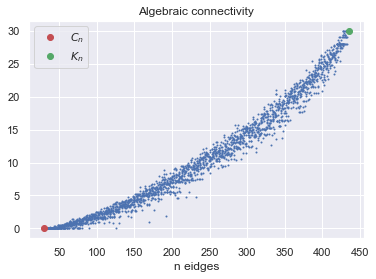

In [13]:
import seaborn as sns
sns.set()
keys = np.repeat(np.array(list(results.keys())), n_repeat)
values = np.array(list(results.values())).reshape(-1)


plt.scatter(keys, values, s=1.)
plt.title('Algebraic connectivity')
plt.xlabel('n eidges')
plt.plot(n_vertices, ceig, 'ro', label=r'$C_n$')
plt.plot((n_vertices * (n_vertices - 1))//2, keig, 'go', label=r'$K_n$')
plt.legend()
plt.show()

Consider the graph $C_n$ and let's show the partition of this graph

Num positive components: 15
Num negative components: 15


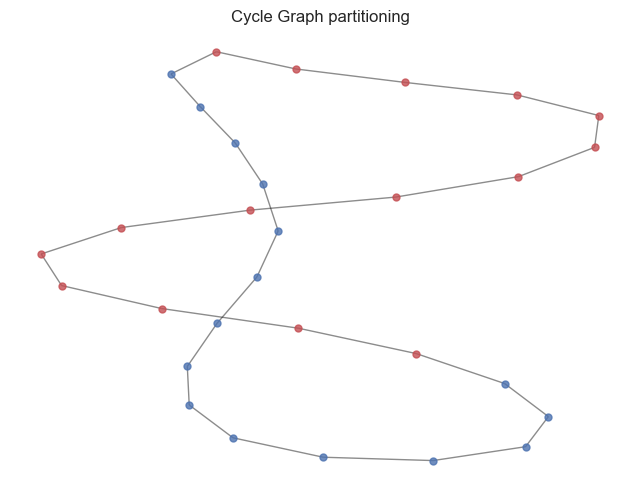

In [25]:
random.seed(41)
np.random.seed(41)
graph = nx.cycle_graph(n_vertices)
A = nx.linalg.graphmatrix.adjacency_matrix(graph)
vec, eigs, tol = partition(
        A, shift, num_iter_fix, num_iter_adapt, x_0, eps, verbose=False)
draw_partition(graph, vec, title='Cycle Graph partitioning')

**Conclusion** 

As we can see from the `Algebraic connectivity` dependence the algebraic connectivity correlates with count of edges of the graph pretty well, so it indeed can be considered as measure of `connectivity` of a graph.

### Image bipartition (10 pts)

Let us deal here with a graph constructed from a binarized image.
Consider the rule, that graph vertices are only pixels with $1$, and each vertex can have no more than $8$ connected vertices (pixel neighbours), $\textit{i.e}$ graph degree is limited by 8.
* (3 pts) Find an image with minimal size equal to $(256, 256)$ and binarize it such that graph built on black pixels has exactly $1$ connected component.
* (5 pts) Write a function that constructs sparse adjacency matrix from the binarized image, taking into account the rule from above.
* (2 pts) Find the partition of the resulting graph and draw the image in accordance with partition.

**Task 2.3**

At first, let's load the image

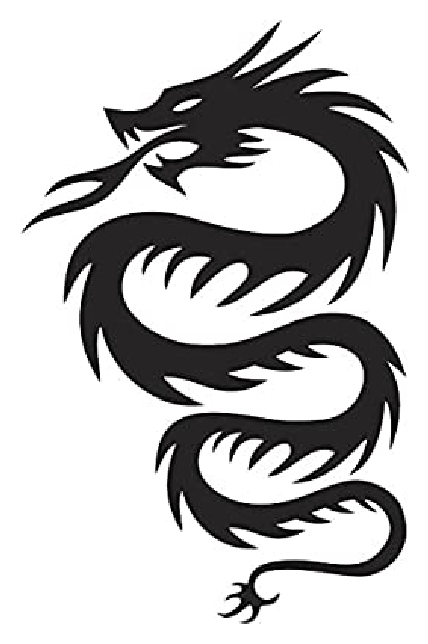

In [183]:
# Your solution is here
import numpy as np
from PIL import Image

image = Image.open('./dragon.jpg')
plt.figure(dpi=200)
plt.axis('off')
plt.imshow(image)
plt.show()

Now, let's binarize the image

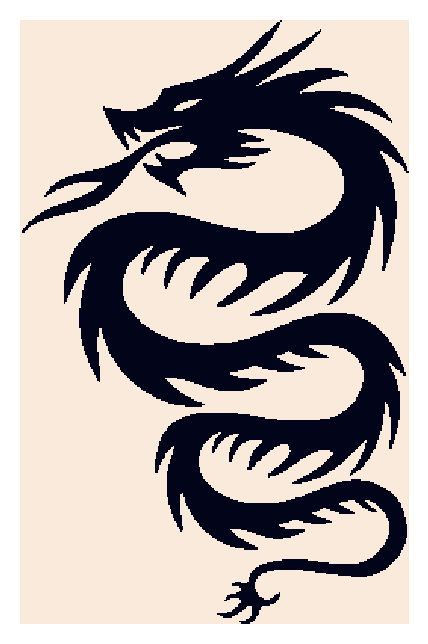

In [184]:
thresh = 200
fn = lambda x : 255 if x > thresh else 0
bin_image = image.convert('L').point(fn, mode='1')
pix_array = 1 - np.array(bin_image).astype(int) # `white` color corresponds to 0
plt.figure(dpi=200)
plt.axis('off')
plt.imshow(1 - pix_array)
plt.show()

Now, let's create the adjacency matrix $A$ which corresponds to our image.
At first, we set the size of matrix $A$ as multiplication of dimensions of the image.
During the further steps we remove unnecessary dimensions (which corresponds to white pixels)

In [149]:
gi = lambda i, j : i * pix_array.shape[1] + j
adj_m_shape = pix_array.shape[0] * pix_array.shape[1]
A = spsp.csr_matrix((adj_m_shape, adj_m_shape))

Here we pefrorm the filling of matrix $A$. We match pixel `i,j` of original image to the value `a(i, j) = i*image.shape[1] + j`, and set `A[a(i_1, j_1), a(i_2, j_2)]` to be equal to 1 iff pixels `i_1, j_1` and `i_2, j_2` are connected.

In [151]:
def adj_by_direction(arr, sparse_Adj, i, j):
    if i == 1 and j == 1:
        _sum = arr[:-1, :-1] + arr[1:, 1:]
        p_col = [0, 1]
        p_row = [0, 1]
    elif i == 0 and j == 1:
        _sum = arr[:, 1:] + arr[:, :-1]
        p_col = [0, 0]
        p_row = [0, 1]
    elif i == -1 and j == 1:
        _sum = arr[:-1, 1:] + arr[1:, :-1]
        p_col = [1, 0]
        p_row = [0, 1]
    elif i == -1 and j == 0:
        _sum = arr[1:, :] + arr[:-1, :]
        p_col = [0, 1]
        p_row = [0, 0]
    else:
        return None
    col, row = np.where(_sum == 2)
    ind_1 = (col + p_col[0])*arr.shape[1] + (row + p_row[0])
    ind_2 = (col + p_col[1])*arr.shape[1] + (row + p_row[1])
    sparse_Adj[ind_1, ind_2] = 1
    sparse_Adj[ind_2, ind_1] = 1
    return None


for i in [-1, 0, 1]:
    for j in [-1, 0, 1]:
        adj_by_direction(pix_array, A, i, j)

# elements, which corresponds to `black color`
nnvals = np.where(A.getnnz(1)>0)[0]
# here we remove all white-colored pixels
A = A[A.getnnz(1)>0][:,A.getnnz(0)>0]
print(nnvals)

[   172    427    428 ... 102692 102693 102694]


Now, we launch the `partition`.

In [185]:
shift = 1e-8
num_iter_fix = 20
num_iter_adapt = 20
eps = 1e-16
x_0 = np.random.rand(len(nnvals))
vec, eigs, tol = partition(
        A, shift, num_iter_fix, num_iter_adapt, x_0, eps, verbose=False)
print(eigs[-1])

1.9144195321750935e-05


Here we define the indices, which corresponds to positive partition

In [186]:
pos_ind = np.where(vec > 0)[0]
im_pos_ind = nnvals[pos_ind]
i_pos = im_pos_ind // pix_array.shape[1]
j_pos = im_pos_ind % pix_array.shape[1]

Here we assign new color to positive partitioned indices and draw the final partitioned image

In [187]:
pix_array_copy = pix_array.copy()
pix_array_copy[i_pos, j_pos] = 3

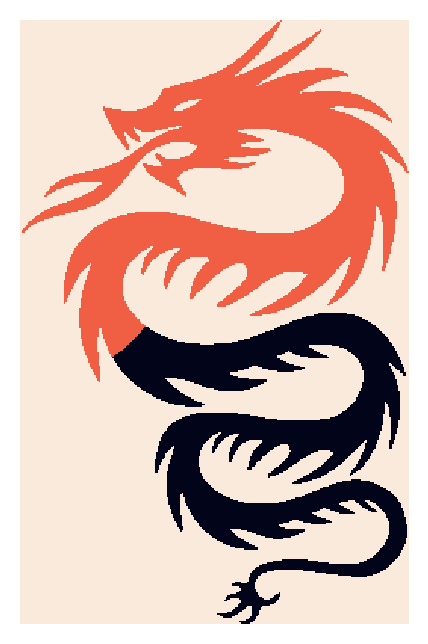

In [188]:
plt.figure(dpi=200)
plt.axis('off')
plt.imshow(1 - pix_array_copy)
plt.show()


## Problem 3 (25 pts)

**Disclaimer**: this problem is released first time, so some typos can be found. 

## Mathematical model (Navier-Stokes equations)

The governing equations for two-dimensional incompressible
flows can be written in a dimensionless form as:

\begin{equation}\tag{1}
\dfrac{\partial \omega}{\partial t} = \dfrac{1}{Re} \big(\dfrac{\partial^2 \omega}{\partial x^2} + \dfrac{\partial^2 \omega}{\partial y^2}\big) - \big(\dfrac{\partial \psi}{\partial y} \dfrac{\partial \omega}{\partial x} - \dfrac{\partial \psi}{\partial x} \dfrac{\partial \omega}{\partial y}\big),
\end{equation}

along with the kinematic relationship between vorticity $\omega(x,y,t)$ and stream function $\psi(x,y,t)$ according to the Poisson equation, which is given as:

\begin{equation}\tag{2}
\dfrac{\partial^2 \psi}{\partial x^2} + \dfrac{\partial^2 \psi}{\partial y^2} = -\omega.
\end{equation}

We consider equations (1) and (2) in the computational domain $\Omega = [0, 2\pi] \times [0, 2\pi]$ and impose the following periodic boundary conditions:

$$\omega(x,0,t) =\omega(x, 2\pi, t), \quad \omega(0,y,t) =\omega(2\pi, y, t), \quad t \geq 0,$$
and the same for $\psi(x,y,t)$.

Note: the Reynolds number, referred to as $Re$, is a fundamental physical constant that in particular determines whether the fluid flow is laminar or turbulent.

## The animation below represents a particular solution of the Navier-Stokes equations (1) and (2) and you will get it in the end of this problem
<img src="vorticity_N1024_Re10000.0_tau0.001.gif" />

# Fourier-Galerkin pseudospectral method

Fourier series expansion based methods are often used for solving problems with periodic boundary conditions. One of the most accurate methods for solving the Navier–Stokes equations in periodic domains is **the pseudospectral method**, which exploits the Fast Fourier Transform (FFT) algorithm. 

Outline: the main idea of spectral methods is to write the solution of a differential equation as a sum of certain "basis functions" (e.g. Fourier series, Chebyshev polynomials etc) and then to choose the coefficients in the sum in order to satisfy the differential equation as well as possible.

Comprehensive survey of such methods can be found in [this book](https://depts.washington.edu/ph506/Boyd.pdf).

### Discrete Fourier Transform

We discretize the domain $[0,L_x]\times[0, L_y]$ by introducing a computation **grid** consisting of $N_x \times N_y$ equally spaced points.

The discrete grid coordinates for $i = 0, 1, \ldots, N_x$ and $j = 0, 1, \ldots, N_y$ are given by:

$$x_i = \frac{i L_x}{N_x}, \quad y_j = \frac{j L_y}{N_y}.$$

Note, that since the domain is periodic $x_0 = x_{N_x}$ and $y_0 = y_{N_y}$.

 Then, any discrete function $u_{i,j} = u(x_i,y_j)$ can be transformed to the Fourier space using the Discrete Fourier Transform (DFT):

$$ 
\tilde{u}_{m,n} = \sum_{i = 0}^{N_x - 1}\sum_{j = 0}^{N_y - 1} u_{i, j}e^{
\mathbf{i}(\frac{2\pi m}{L_x}x_i + \frac{2\pi n}{L_y}y_j)},
$$

and its inverse transform is:

$$ u_{i,j} = \frac{1}{N_x N_y} \sum_{m = -\frac{N_x}{2}}^{\frac{N_x}{2} - 1}\sum_{n = -\frac{N_y}{2}}^{\frac{N_y}{2} - 1} \tilde{u}_{m, n}e^{\mathbf{i}(\frac{2\pi m}{L_x}x_i + \frac{2\pi n}{L_y}y_j)},$$

where $i$ and $j$ represent indices for the physical space (i.e. coordinates in the introduced grid), $m$ and $n$ are indices in the Fourier space (i.e. frequencies). 


We also introduce wavenumbers:

$$k_x = \frac{2\pi m}{L_x}, \quad k_y = \frac{2 \pi n}{L_y}.$$


**Bonus question:** how DFT coefficients $\tilde{u}_{m,n}$ relate to coefficients in the truncated Fourier series of $u(x,y)$?

### Differentiation
In Fourier space we can easily perform differentiation with respect to $x$ and $y$. For example, the
first and the second order derivatives of any function $u$ in discrete
domain becomes:

$$ \left(\dfrac{\partial u}{\partial x}\right)_{i,j} = \frac{1}{N_x N_y}\sum_{m = -\frac{N_x}{2}}^{\frac{N_x}{2} - 1}\sum_{n = \frac{N_y}{2}}^{\frac{N_y}{2} - 1} \tilde{u}_{m, n} (\mathbf{i}k_x) e^{\mathbf{i}(k_x x_i + k_y y_j)}, $$

$$ \left(\dfrac{\partial^2 u}{\partial x^2}\right)_{i,j} = \frac{1}{N_x N_y}\sum_{m = -\frac{N_x}{2}}^{\frac{N_x}{2} - 1}\sum_{n = -\frac{N_y}{2}}^{\frac{N_y}{2} - 1} \tilde{u}_{m, n} (-k_x^2) e^{\mathbf{i}(k_x x_i + k_y y_j)}, $$

and similarly for the derivatives w.r.t. $y$ 

Assume $L_x = L_y = L = 2\pi$, $N_x = N_y = N$ for simplicity. Then, differentiation $\frac{\partial}{\partial x}$ in the Fourier space can be implemented as follows:

In [5]:
k1d = np.fft.fftfreq(3) * 3
print(k1d)

[ 0.  1. -1.]


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [16]:
def dudx(u_tilde, N):
    k1d = np.fft.fftfreq(N) * N
    return u_tilde * (1j * k1d)

 Note, we use ```np.fft.fftfreq(N)``` to determine the order of frequencies for certain ```numpy``` implementation (see the documentation of ```numpy.fft``` module for details).

Consider the following example:

In [6]:
L = 2*np.pi # size of computational domain
d = 7
N = 2**d

In [11]:
# discretize the domain $[0, 2\pi] \times [0, 2\pi]$ with uniform grid

ls = np.linspace(0, L, N, endpoint=False)
xx, yy = np.meshgrid(ls, ls, indexing='xy')

# define simple periodic function
u = np.sin(xx) * np.sin(yy) 

# first, compute du/dx analytically
u_x = np.cos(xx) * np.sin(yy) 

# next, compute du/dx in Fourier space
u_tilde = np.fft.ifft2(u)

u_tilde_x = dudx(u_tilde, N)
u_x_fourier = np.fft.ifft2(u_tilde_x)

# check the result
err = np.linalg.norm(u_x - u_x_fourier)
print("error = ", err)

error =  5.417463750901354e-13


- (5 pts) Similarly with the implementation of ```dudx(u_tilde, N)``` given above, your first task is to implement other derivatives arising in the Navier-Stokes equtions (1), (2). Loops are prohibited!

In [23]:
def dudy(u_tilde, N):
    k2d = np.fft.fftfreq(N) * N
    return u_tilde * (-1j * k2d[:, np.newaxis])

def d2udx2(u_tilde, N):
    k1d = np.fft.fftfreq(N) * N
    return u_tilde * (-1 * k1d ** 2)
 
def d2udy2(u_tilde, N):
    k2d = np.fft.fftfreq(N) * N
    return u_tilde * (-1 * k2d[:, np.newaxis] ** 2)


Let's test the implemented functions using the same function, as we use for testing `dudx`

In [24]:
# discretize the domain $[0, 2\pi] \times [0, 2\pi]$ with uniform grid
ls = np.linspace(0, L, N, endpoint=False)
xx, yy = np.meshgrid(ls, ls, indexing='xy')

# the function
u = np.sin(xx) * np.sin(yy) 

# compute du/dy analytically
u_y = np.sin(xx) * np.cos(yy)

# compute d2u/dx2 analytically
u2_x2 = - u

# compute  d2u/dy2 analytically
u2_y2 = - u

# u_tilde
u_tilde = np.fft.ifft2(u)

# compute the derivatives using fourier tecnique
u_y_fourier = np.fft.fft2(dudy(u_tilde, N))
u2_x2_fourier = np.fft.fft2(d2udx2(u_tilde, N))
u2_y2_fourier = np.fft.fft2(d2udy2(u_tilde, N))

# check the result
print("u_y error: ", np.linalg.norm(u_y - u_y_fourier))
print("u2_x2_error: ", np.linalg.norm(u2_x2 - u2_x2_fourier))
print("u2_y2_error: ", np.linalg.norm(u2_y2 - u2_y2_fourier))

u_y error:  5.678806548086086e-13
u2_x2_error:  2.679559280454021e-11
u2_y2_error:  2.684774733733834e-11


### Navier-Stokes equations in the Fourier space

After transforming Eq. (1) and Eq. (2) to the Fourier space, the governing equations become:

\begin{equation}\tag{3}
\frac{\partial \tilde{\omega}_{m,n}}{\partial t} = \frac{1}{Re}[(-k_x^2 - k_y^2)\tilde{\omega}_{m,n}] - \tilde{N},
\end{equation}

\begin{equation}\tag{4}
(-k_x^2 - k_y^2)\tilde{\psi}_{m,n} = -\tilde{\omega}_{m,n},
\end{equation}

where $\tilde{N}$ represents the non-linear term which is computed using 2D convolutions as follows:

$$\tilde{N} = (\mathbf{i}k_y \tilde{\psi}_{m,n}) \circ (\mathbf{i}k_x \tilde{\omega}_{m,n}) - (\mathbf{i}k_x \tilde{\psi}_{m,n}) \circ (\mathbf{i}k_y \tilde{\omega}_{m,n}),$$

i.e. multiplications in physical space become convolutions in the Fourier space.

To clarify where these convolutions come from, consider two discrete functions $u$ and $v$ represented by their DFT (1D for simplicity):

$$ u_{i} = \frac{1}{N_x} \sum_{m = -\frac{N_x}{2}}^{\frac{N_x}{2} - 1} \tilde{u}_{m}e^{\mathbf{i}\frac{2\pi m}{L_x}x_i},$$

$$ v_{i} = \frac{1}{N_x} \sum_{n = -\frac{N_x}{2}}^{\frac{N_x}{2} - 1}\tilde{v}_{n}e^{\mathbf{i}\frac{2\pi n}{L_x}x_i}.$$

Then, the direct multiplication results in:
$$ u_{i} v_{i} = \frac{1}{N_x} \sum_{k = -N_x}^{N_x - 2} \frac{1}{N_x}\tilde{w}_{k}e^{\mathbf{i}\frac{2\pi k}{L_x}x_i},$$
where the coefficients $\tilde{\omega}_k$ are computed as follows (check it!):

$$\tilde{w}_{k} = \sum_{m + n = k}\tilde{u}_m\tilde{v}_n.$$


Below we provide a possible implementation of 2D convolution using ```scipy.signal``` module. Note, that *full* convolution introduces higher frequinces that should be truncated in a proper way.

In [82]:
from scipy import signal

def conv2d_scipy(u_tilde, v_tilde, N):
    # np.fft.fftshift is used to align implementation and formulas
    full_conv = signal.convolve(np.fft.fftshift(u_tilde),\
                              np.fft.fftshift(v_tilde), mode='full')
    trunc_conv = full_conv[N//2:-N//2+1, N//2:-N//2+1]
    return np.fft.ifftshift(trunc_conv)/(N*N)


(10 pts) Your second task is to implement the same 2D convolution but using the *Convolution Theorem* in this time.


 
 Hint:  From the lecture course you should know that applying *Convolution Theorem* is straightforward when computing **circular** (or periodic) convolutions. However, for this task you should use an appropriate zero-padding by a factor of two (with further truncation).

 **Implementation** of `conv2d` is here:

In [203]:
def pad_or_truncate(d_arr, s_arr, dim1, dim2):
    lb1 = dim1//2
    rb1 = -dim1//2
    lb2 = dim2//2
    rb2 = -dim2//2
    d_arr[:lb1, :lb2] = s_arr[:lb1, :lb2]
    d_arr[rb1:, rb2:] = s_arr[rb1:, rb2:]
    d_arr[:lb1, rb2:] = s_arr[:lb1, rb2:]
    d_arr[rb1:, :lb2] = s_arr[rb1:, :lb2]
    return d_arr

def zeropad(arr):
    dim1 = arr.shape[0]
    dim2 = arr.shape[1]
    p_arr = np.zeros((dim1 * 2 , dim2 * 2 ))
    return pad_or_truncate(p_arr, arr, dim1, dim2)

def truncate(p_arr):
    dim1 = p_arr.shape[0]
    dim2 = p_arr.shape[1]
    assert dim1 % 2 == 0 and dim2 % 2 == 0
    dim1 = dim1//2 
    dim2 = dim2//2 
    arr = np.zeros((dim1, dim2))
    return pad_or_truncate(arr, p_arr, dim1, dim2)

def conv2d(u_tilde, v_tilde, N):
    p_u_tilde = zeropad(u_tilde)
    p_v_tilde = zeropad(v_tilde)
    p_u = np.fft.fft2(p_u_tilde)
    p_v = np.fft.fft2(p_v_tilde)
    p_mul = p_u * p_v
    p_mul_tilde = np.fft.ifft2(p_mul)
    mul_tilde = truncate(p_mul_tilde)
    return mul_tilde / N**2

In [204]:
# check yourself

u_tilde = np.random.rand(N, N)
v_tilde = np.random.rand(N, N)

err = np.linalg.norm(conv2d(u_tilde, v_tilde, N) - conv2d_scipy(u_tilde, v_tilde, N))
print("error =", err) # should be close to machine precision

error = 3.4790371266337506e-15


**Poisson solver**

Finally, we need to solve the Poisson equation Eq. (2) which can be easily computed in the Fourier space according to the Eq. (4).


(5 pts) Implement inverse of the laplacian operator according to the template provided below. Note: the laplacian operator with periodic boundary conditions is singular (since the constant function is in nullspace). So, in order to avoid division by zero:
1. Assume the problem is always consistent (i.e. $\tilde{\omega}_{0,0} = 0$), 
2. Assume $\tilde{\psi}_{0,0} = 0$ (i.e. return normal solution). Loops are prohibited!

In [ ]:
def laplace_inverse(omega_tilde, N):
    psi_tilde = None
    return psi_tilde

In [ ]:
# check yourself

# consider simple solution
sol_analytic = np.sin(xx)*np.sin(yy)

# compute corresponding right hand side analytically
rhs = -2*np.sin(xx)*np.sin(yy)

# solve Poisson problem in Fourier space
rhs_tilde = np.fft.fft2(rhs)
sol_tilde = laplace_inverse(rhs_tilde, N)
sol = np.fft.ifft2(sol_tilde)

# check error is small
err = np.linalg.norm(sol - sol_analytic)
print("error =", err)

error = 1.8561658787461062e-14


**Time integration**

Eqs. (3) and (4) can be considered as semi-discrete ordinary differential equations (ODEs) obtained after (spectral) spatial discretization of the partial differential equations (1) and (2):

\begin{equation}\tag{5}
\frac{d \tilde{\omega}}{dt} = \mathcal{L}(\tilde{\omega}, \tilde{\psi}),
\end{equation}

where $\mathcal{L}( \tilde{\omega} , \tilde{\psi})$ is the discrete operator of spatial derivatives including non-linear convective terms, linear diffusive terms, and $\tilde{\psi}$ which is obtained from the Poisson equation (4).

(5 pts) Implement $\mathcal{L}$ according to the template provided below

In [ ]:
def L_op(omega_tilde, psi_tilde, N, Re=1):
    pass

We integrate in time using fourth-order Runge–Kutta scheme that can be written in the following form:

$$\tilde{\omega}^{(1)} = \tilde{\omega}^{n} + \frac{\Delta t}{2}\mathcal{L}(\tilde{\omega}^{n}, \tilde{\psi}^{n})$$

$$\tilde{\omega}^{(2)} = \tilde{\omega}^{n} + \frac{\Delta t}{2}\mathcal{L}(\tilde{\omega}^{(1)}, \tilde{\psi}^{(1)})$$

$$\tilde{\omega}^{(3)} = \tilde{\omega}^{n} + \Delta t\mathcal{L}(\tilde{\omega}^{(2)}, \tilde{\psi}^{(2)})$$

$$\tilde{\omega}^{n+1} = \frac{1}{3}(-\tilde{\omega}^{n} + \tilde{\omega}^{(1)} + 2\tilde{\omega}^{(2)} + \tilde{\omega}^{(3)}) + \frac{\Delta t}{6}\mathcal{L}(\tilde{\omega}^{3}, \tilde{\psi}^{3})$$



In [ ]:
def integrate_runge_kutta(omega0_tilde, N, n_steps, tau, Re):
    omega_prev = omega0_tilde
    psi_prev = laplace_inverse(-omega_prev, N)
    for step in range(n_steps):
        if(step%100 == 0):
            print(step)
        omega_1 = omega_prev + (tau/2)*L_op(omega_prev, psi_prev, N, Re)
        psi_1 = -laplace_inverse(omega_1, N)

        omega_2 = omega_prev + (tau/2)*L_op(omega_1, psi_1, N, Re)
        psi_2 = -laplace_inverse(omega_2, N)

        omega_3 = omega_prev + tau*L_op(omega_2, psi_2, N, Re)
        psi_3 = -laplace_inverse(omega_3, N)

        omega_next = (1./3)*(-omega_prev + omega_1 + 2*omega_2 + omega_3) + (tau/6)*L_op(omega_3, psi_3, N, Re)
        psi_next = -laplace_inverse(omega_next, N)

        omega_prev = omega_next
        psi_prev = psi_next
    return omega_prev

### Validation with analytical solution

We first consider the Taylor-Green vortex (known analytical solution of the Navier-Stokes equations) to validate our solver:

In [ ]:
# Taylor-Green vortex -- analytical solution for validation purposes

def taylor_green_vortex(xx, yy, t, N, Re):
    k = 3
    omega = 2*k*np.cos(k*xx)*np.cos(k*yy)*np.exp(-2*k**2*t*(1/Re))
    return omega

In [ ]:

Re = 1000
tau = 1e-2 # timestep
n_steps = 100
T = tau * n_steps # finial time

omega0 = taylor_green_vortex(xx, yy, 0, N, Re) # initial vorticity
omega0_tilde = np.fft.fft2(omega0) # convert to the Fourier space
omegaT_tilde = integrate_runge_kutta(omega0_tilde, N, n_steps, tau, Re) # integrate in time in the Fourier space
omegaT = np.real(np.fft.ifft2(omegaT_tilde)) # return back to physical space

0


In [ ]:
# check the error is small

omegaT_analytical = taylor_green_vortex(xx, yy, T, N, Re) 
err = np.linalg.norm(omegaT_analytical - omegaT)
print("error =", err)

error = 2.3043898350926834e-12


### Shear layer problem

Finaly, we consider another (more interesting) initial vorticity that gives the dynamic from the GIF in the beginning of this problem.

In [ ]:
# intial condition that evolves like a vortex

def shear_layer0(xx, yy, N):
    delta = 0.05
    sigma = 15/np.pi
    a = delta*np.cos(yy[:, :N//2]) - sigma*(np.cosh(sigma*(xx[:, :N//2] - np.pi/2)))**(-2)
    b = delta*np.cos(yy[:, N//2:]) + sigma*(np.cosh(sigma*(3*np.pi/2 - xx[:, N//2:])))**(-2)
    return np.concatenate((a, b), axis=1)

In [ ]:
Re = 10000
tau = 1e-3 # timestep
n_steps = 10000
T = tau * n_steps # finial time

omega0 = shear_layer0(xx, yy, N) # initial vorticity
omega0_tilde = np.fft.fft2(omega0) # convert to the Fourier space
omegaT_tilde = integrate_runge_kutta(omega0_tilde, N, n_steps, tau, Re) # integrate in time in the Fourier space
omegaT = np.real(np.fft.ifft2(omegaT_tilde)) # return back to physical space

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900


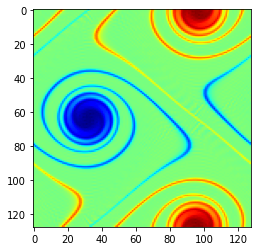

In [ ]:
# plot the solution at the final timestamp

plt.imshow(np.real(np.fft.ifft2(omega_final)), cmap='jet')